In [26]:
from friendsfamilytest.params import *
from friendsfamilytest.sheethelper import *
from friendsfamilytest.data import *
from friendsfamilytest.utils import *

import pandas as pd 
import seaborn as sns
import sketch
import calplot

from wordcloud import WordCloud
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
data = load_google_sheet()

2024-03-25 00:15:06.824 | INFO     | friendsfamilytest.utils:wrapper:100 - Function 'load_google_sheet' ⚡️1.898790 sec


In [28]:
data.tail()

,time,rating,free_text,do_better,surgery
3706,2024-03-24 20:27:48,Extremely likely,"Always as expected, I’m satisfied with my GP p...",,Emperor's Gate Surgery
3707,2024-03-24 23:05:39,Extremely likely,Perfect,,Emperor's Gate Surgery
3708,2024-03-24 23:13:59,Extremely likely,"Love the surgery no complaints, all staff frie...",More oppertunity to hear what the practice is ...,Earls Court Surgery
3709,2024-03-24 23:31:38,Extremely likely,"Sorry, I’m not good at using websites but over...",,Earls Court Medical Centre
3710,2024-03-25 00:10:28,Extremely likely,"Very happy with my surgery, thank you",,Earls Court Surgery


In [29]:
data.duplicated().sum()

4

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3711 entries, 0 to 3710
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   time       3711 non-null   datetime64[ns]
 1   rating     3711 non-null   object        
 2   free_text  3711 non-null   object        
 3   do_better  3711 non-null   object        
 4   surgery    3711 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 145.1+ KB


In [32]:
data.sort_values(by='time', inplace=True)

In [33]:
data

,time,rating,free_text,do_better,surgery
0,2023-07-13 15:28:22,Extremely likely,"Very friendly caring staff, treated me with re...",Keep it up,Earls Court Surgery
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,,Earls Court Surgery
2,2023-07-13 15:29:21,Extremely likely,The doctor was very understanding and very kno...,No. It was the best.,Earls Court Surgery
3,2023-07-13 15:30:10,Extremely likely,Dr E was extremely nice,the receptionist was very unkind,Earls Court Surgery
4,2023-07-13 15:31:48,Extremely likely,I was spoken to politely on the phone and a te...,No. I was happy with everything.,Earls Court Surgery
...,...,...,...,...,...
3706,2024-03-24 20:27:48,Extremely likely,"Always as expected, I’m satisfied with my GP p...",,Emperor's Gate Surgery
3707,2024-03-24 23:05:39,Extremely likely,Perfect,,Emperor's Gate Surgery
3708,2024-03-24 23:13:59,Extremely likely,"Love the surgery no complaints, all staff frie...",More oppertunity to hear what the practice is ...,Earls Court Surgery
3709,2024-03-24 23:31:38,Extremely likely,"Sorry, I’m not good at using websites but over...",,Earls Court Medical Centre


In [ ]:
for index, row in data.iterrows():
    print(row['free_text'])
    print(index)

In [2]:
data2 = pd.read_csv('../friendsfamilytest/data/data.csv')

In [3]:
data2.head()

,time,rating,free_text,do_better,surgery,free_text_len,do_better_len,rating_score,classif,classif_scores,sentiment,sentiment_score,improvement_labels,feedback_labels
0,2023-07-13 15:28:22,Extremely likely,"Very friendly caring staff, treated me with re...",NaN,Earls Court Surgery,13.0,3,5.0,NaN,NaN,positive,0.909031,NaN,Overall Patient Satisfaction
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,NaN,Earls Court Surgery,4.0,0,5.0,NaN,NaN,positive,0.925523,NaN,Patient Privacy and Confidentiality
2,2023-07-13 15:29:21,Extremely likely,The doctor was very understanding and very kno...,No. It was the best.,Earls Court Surgery,8.0,5,5.0,NaN,NaN,positive,0.971687,Overall Patient Satisfaction,Medical Staff Competence
3,2023-07-13 15:30:10,Extremely likely,Dr [PERSON] was extremely nice,the receptionist was very unkind,Earls Court Surgery,5.0,5,5.0,NaN,NaN,positive,0.982086,Reception Staff Interaction,Patient-Doctor Communication
4,2023-07-13 15:31:48,Extremely likely,I was spoken to politely on the phone and a te...,No. I was happy with everything.,Earls Court Surgery,44.0,6,5.0,NaN,NaN,neutral,0.755115,Overall Patient Satisfaction,Follow-Up and Continuity of Care


In [16]:
data2.columns
data2['time'] = pd.to_datetime(data2['time'])

In [17]:
data2.drop(columns=['polarity', 'subjectivity', 'neg', 'neu', 'pos', 'compound'], inplace=True)

In [18]:
# Group by sentiment and resample by week, then calculate the mean sentiment_score
weekly_sentiment_means_adjusted = data2.groupby('sentiment').resample('W')['sentiment_score'].mean().unstack(level=0)

# Fill any possible NaN values with 0 (assuming no sentiment means neutral)
weekly_sentiment_means_adjusted = weekly_sentiment_means_adjusted.fillna(0)

weekly_sentiment_means_adjusted.head()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [19]:
import matplotlib
matplotlib.use('TkAgg')  # Use 'Agg', 'TkAgg', 'Qt4Agg', 'Qt5Agg', etc., depending on your preferences and environment
import matplotlib.pyplot as plt

In [20]:
import seaborn as sns

# Melting the DataFrame to long format for easier plotting with seaborn
data_long = weekly_sentiment_means_adjusted.reset_index().melt(id_vars='time', var_name='Sentiment', value_name='Average Score')

# Creating the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_long, x='time', y='Average Score', hue='Sentiment', marker='o')

plt.title('Weekly Sentiment Score Averages', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Average Sentiment Score', fontsize=12)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

NameError: name 'weekly_sentiment_means_adjusted' is not defined

In [21]:
data2_weekly

NameError: name 'data2_weekly' is not defined

In [ ]:
!pip install --upgrade matplotlib

In [ ]:
def check_column_length(dataframe):
    short_phrases = []

    # Iterate over each entry in the 'do_better' column
    for entry in dataframe['free_text']:
        # Count the number of words in the entry
        word_count = len(str(entry).split())

        # Check if the word count is less than 5
        if word_count < 30:
            short_phrases.append(entry)

    # Print the list of entries with fewer than 5 words
    print("Entries with fewer than 5 words:", short_phrases)

# Example usage
# Assuming 'df' is your DataFrame and it has a column named 'do_better'
# df = pd.DataFrame({'do_better': ['Improve communication', 'Be more timely', 'Feedback', 'Enhance portal usability', 'Listen more']})
# check_do_better_column(df)

In [ ]:
check_column_length(data)

In [ ]:
def check_column_length(dataframe, column_name, word_count_length):
    # Iterate over each entry in the specified column
    for index, entry in enumerate(dataframe[column_name]):
        # Count the number of words in the entry
        word_count = len(str(entry).split())

        # Check if the word count is less than the specified limit
        if word_count < word_count_length:
            # Replace with NaN if the condition is met
            dataframe.at[index, column_name] = pd.nan

    return dataframe

In [ ]:
check_column_length(data2, 'do_better', 4)

In [ ]:
check_column_length(data2, 'free_text', 2)

In [11]:
data = pd.read_csv('../friendsfamilytest/data/data.csv')

In [ ]:
data2.head(30)

In [ ]:
import numpy as np

In [ ]:
data2.loc[data2['do_better_len'] < 5, 'do_better'] = np.nan
data2.loc[data2['do_better_len'] < 5, 'improvement_labels'] = np.nan

In [ ]:
data2.head(10)

In [ ]:
data2.loc[data2['free_text_len'] < 3, 'free_text'] = np.nan
data2.loc[data2['free_text_len'] < 3, 'feedback_labels'] = np.nan

In [ ]:
data2.head(30)

In [ ]:
data2.shape

In [ ]:
# Saving the indexes corresponding to rows
boolean_mask = (data2['free_text_len']> 10)

# Applying the boolean filteraing
data3 = data2[boolean_mask].reset_index(drop=True)

In [ ]:
data3

In [ ]:
data3.columns

In [ ]:
data3[['time', 'rating', 'free_text', 'do_better', 'surgery', 'free_text_len',
       'do_better_len', 'rating_score', 'classif', 'classif_scores',
       'sentiment', 'sentiment_score', 'improvement_labels', 'polarity',
       'subjectivity', 'feedback_labels']]

In [ ]:
data3.drop(columns=['neg', 'neu', 'pos', 'compound'], inplace=True)

In [ ]:
data3

In [ ]:
import sketch
data3.sketch.ask("WHat is the average Neutral sentiment score?")

In [ ]:
data = pd.read_csv('../friendsfamilytest/data/data.csv')

In [ ]:
data

In [ ]:
data = clean_data(data)

In [ ]:
data.head(30)

In [ ]:
data.to_csv('data.csv', index=False)

In [7]:
calplot.calplot(data2['sentiment_score'], cmap='YlGn', edgecolor='black')

AttributeError: 'RangeIndex' object has no attribute 'year'

In [8]:
import subprocess

result = subprocess.run(["python", "friendsfamilytest/data.py"], shell=True, capture_output=True, text=True)

print(result.stdout)


In [13]:
data['time'] = pd.to_datetime(data['time'])

In [14]:
monthly_count_filtered = data.resample("M", on="time").size()

In [15]:
monthly_count_filtered

time
2023-07-31     102
2023-08-31      99
2023-09-30     109
2023-10-31      99
2023-11-30      42
2023-12-31     152
2024-01-31      76
2024-02-29    1876
2024-03-31    1024
Freq: M, dtype: int64

In [16]:
monthly_count_filtered_df = monthly_count_filtered.reset_index()

In [17]:
monthly_count_filtered_df

,time,0
0,2023-07-31,102
1,2023-08-31,99
2,2023-09-30,109
3,2023-10-31,99
4,2023-11-30,42
5,2023-12-31,152
6,2024-01-31,76
7,2024-02-29,1876
8,2024-03-31,1024


In [18]:
monthly_count_filtered_df.columns = ["Month", "Monthly Count"]

In [19]:
monthly_count_filtered_df

,Month,Monthly Count
0,2023-07-31,102
1,2023-08-31,99
2,2023-09-30,109
3,2023-10-31,99
4,2023-11-30,42
5,2023-12-31,152
6,2024-01-31,76
7,2024-02-29,1876
8,2024-03-31,1024


In [20]:
monthly_count_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Month          9 non-null      datetime64[ns]
 1   Monthly Count  9 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 272.0 bytes


In [21]:
monthly_count_filtered_df["Month"] = pd.to_datetime(
    monthly_count_filtered_df["Month"]
)

In [22]:
monthly_count_filtered_df

,Month,Monthly Count
0,2023-07-31,102
1,2023-08-31,99
2,2023-09-30,109
3,2023-10-31,99
4,2023-11-30,42
5,2023-12-31,152
6,2024-01-31,76
7,2024-02-29,1876
8,2024-03-31,1024


In [23]:
monthly_count_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Month          9 non-null      datetime64[ns]
 1   Monthly Count  9 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 272.0 bytes


In [ ]:
       
# Create the figure and the bar plot
            fig, ax = plt.subplots(figsize=(12, 5))
            sns.barplot(
                data=monthly_count_filtered_df, x="Month", y="Monthly Count", color="#aabd3b"
            )

            # Set grid, spines and annotations as before
            ax.yaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")
            ax.xaxis.grid(False)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["left"].set_visible(False)

            # Annotate bars with the height (monthly count)
            for p in ax.patches:
                ax.annotate(
                    f"{int(p.get_height())}",
                    (p.get_x() + p.get_width() / 2.0, p.get_height()),
                    ha="center",
                    va="center",
                    xytext=(0, 10),
                    textcoords="offset points",
                )

            # Set title to the right
            ax_title = ax.set_title("Monthly FFT Responses - Brompton Health PCN", loc="right")
            ax_title.set_position((1.02, 1))  # Adjust title position

            # Redraw the figure to ensure the formatter is applied
            fig.canvas.draw()

            # Remove xlabel as it's redundant with the dates
            plt.xlabel("")

            # Apply tight layout and display plot
            plt.tight_layout()
            st.pyplot(fig)

In [25]:
import pandas as pd

# Assume you have a pandas Series with datetime64[ns] dtype
dates_with_time = pd.Series(pd.date_range("2024-01-01 12:00:00", periods=3, freq="H"), name="DateTime")

# Convert to date-only format
dates_only = dates_with_time.dt.date

# Check the result
dates_only.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3 entries, 0 to 2
Series name: DateTime
Non-Null Count  Dtype 
--------------  ----- 
3 non-null      object
dtypes: object(1)
memory usage: 152.0+ bytes


In [2]:
%pwd

'/Users/janduplessis/code/janduplessis883/friends-and-family-test-analysis/notebooks'

In [61]:
data = pd.read_csv('../friendsfamilytest/data/data.csv')

In [62]:
data.head()

,time,rating,free_text,do_better,surgery,free_text_len,do_better_len,rating_score,classif,classif_scores,sentiment,sentiment_score,improvement_labels,feedback_labels
0,2023-07-13 15:28:00,Extremely likely,"Very friendly caring staff, treated me with re...",NaN,Earls Court Surgery,13.0,3,5.0,NaN,NaN,positive,0.909031,NaN,Overall Patient Satisfaction
1,2023-07-13 15:29:00,Extremely likely,so good so confidential,NaN,Earls Court Surgery,4.0,0,5.0,NaN,NaN,positive,0.925523,NaN,Patient Privacy and Confidentiality
2,2023-07-13 15:29:00,Extremely likely,The doctor was very understanding and very kno...,No. It was the best.,Earls Court Surgery,8.0,5,5.0,NaN,NaN,positive,0.971687,Overall Patient Satisfaction,Medical Staff Competence
3,2023-07-13 15:30:00,Extremely likely,Dr [PERSON] was extremely nice,the receptionist was very unkind,Earls Court Surgery,5.0,5,5.0,NaN,NaN,positive,0.982086,Reception Staff Interaction,Patient-Doctor Communication
4,2023-07-13 15:31:00,Extremely likely,I was spoken to politely on the phone and a te...,No. I was happy with everything.,Earls Court Surgery,44.0,6,5.0,NaN,NaN,neutral,0.755115,Overall Patient Satisfaction,Follow-Up and Continuity of Care


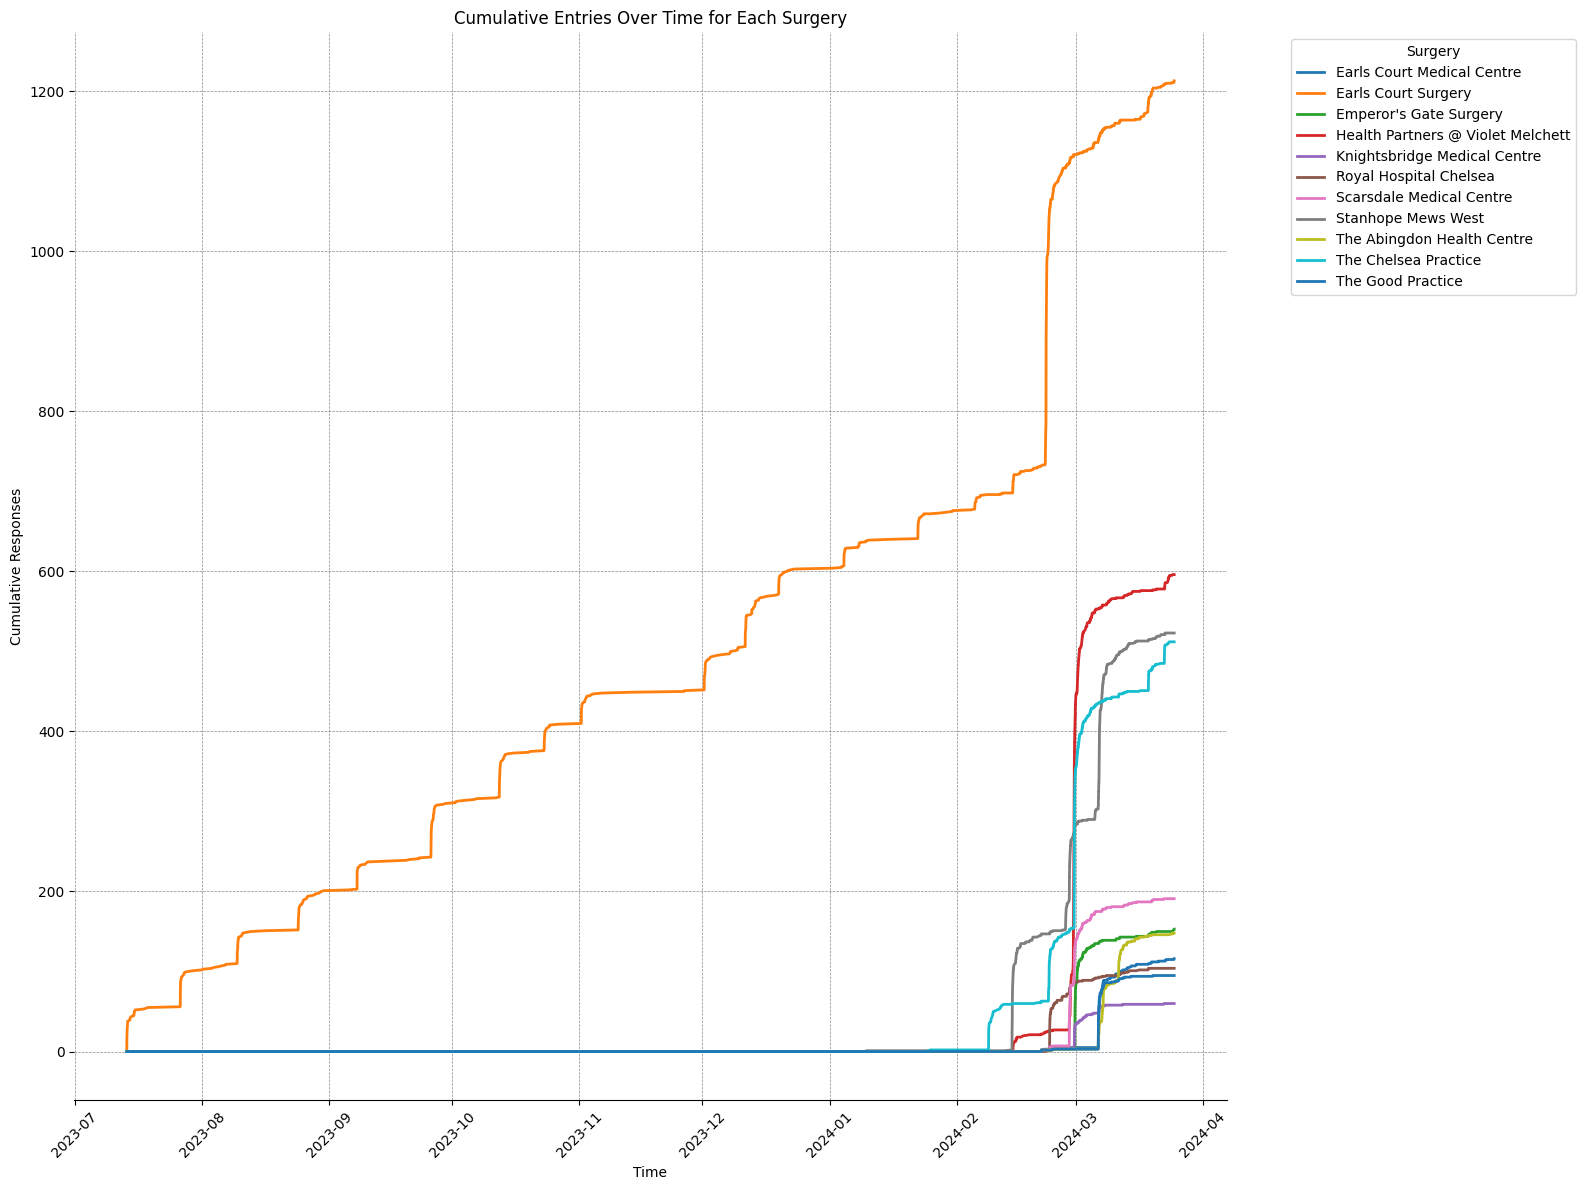

In [54]:
data_sorted = data.sort_values('time')

# Group by 'surgery' and 'time', then calculate the cumulative count
data_sorted['cumulative_count'] = data_sorted.groupby('surgery').cumcount() + 1

# Pivot the table to have surgeries as columns and their cumulative counts as values
data_pivot = data_sorted.pivot_table(index='time', columns='surgery', values='cumulative_count', aggfunc='first')

# Forward fill the NaN values to maintain the cumulative nature
data_pivot_filled = data_pivot.fillna(method='ffill').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(16, 12))
for column in data_pivot_filled.columns:
    
    plt.plot(data_pivot_filled.index, data_pivot_filled[column], label=column, linewidth=2)


ax.xaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")
ax.yaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.title('Cumulative Entries Over Time for Each Surgery')
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Cumulative Responses')
plt.legend(title='Surgery', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

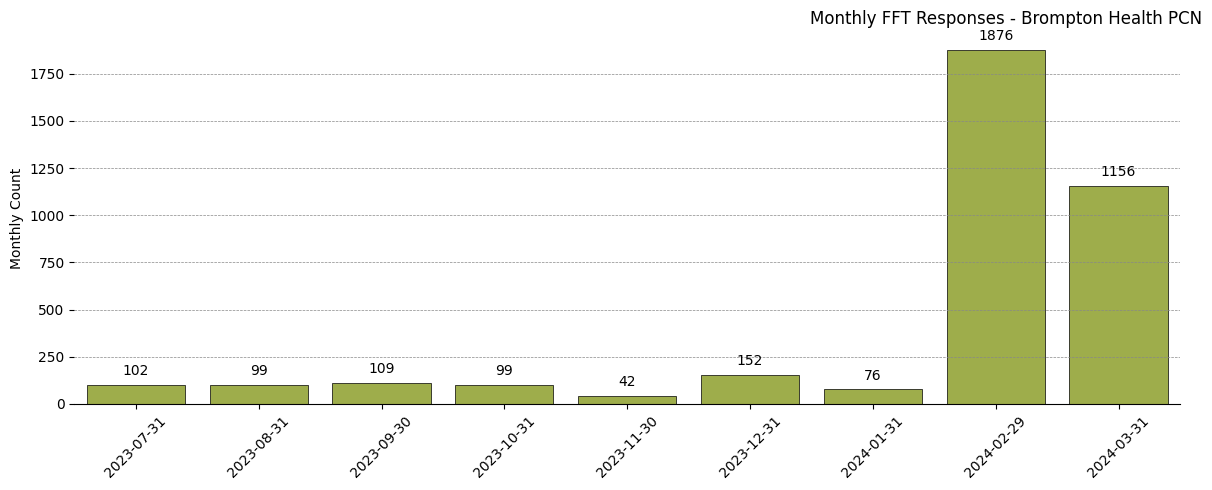

In [58]:
# Monthly Totals Plot
monthly_count_filtered = data.resample("M", on="time").size()
monthly_count_filtered_df = monthly_count_filtered.reset_index()
monthly_count_filtered_df.columns = ["Month", "Monthly Count"]
monthly_count_filtered_df['Month'] = monthly_count_filtered_df['Month'].dt.date

# Create the figure and the bar plot
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(
    data=monthly_count_filtered_df, 
    x="Month", 
    y="Monthly Count", 
    color="#aabd3b", 
    edgecolor='black',  # Set the color of the border
    linewidth=0.5       # Set the width of the border
)

ax.yaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")
ax.xaxis.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# Annotate bars with the height (monthly count)
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

# Adjust title position and set_xticklabels rotation
ax_title = ax.set_title("Monthly FFT Responses - Brompton Health PCN", loc="right")
ax_title.set_position((1.02, 1))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel("")

plt.tight_layout()
plt.show()


In [63]:
neg = data[(data['sentiment'] == 'negative')]

In [64]:
neg.head()

,time,rating,free_text,do_better,surgery,free_text_len,do_better_len,rating_score,classif,classif_scores,sentiment,sentiment_score,improvement_labels,feedback_labels
38,2023-07-14 07:36:00,Extremely unlikely,Not caring practice I am afraid,"More knowledge newly qualified doctors , enthu...",Earls Court Surgery,6.0,7,1.0,NaN,NaN,negative,0.772840,Medical Staff Competence,Overall Patient Satisfaction
102,2023-08-01 10:01:00,Extremely unlikely,"the receptionist behave in an unfriendly way, ...",Strict Adherence to Heart values and talk in p...,Earls Court Surgery,26.0,18,1.0,NaN,NaN,negative,0.894959,Follow-Up and Continuity of Care,Reception Staff Interaction
106,2023-08-05 17:17:00,Extremely likely,NaN,NaN,Earls Court Surgery,1.0,0,5.0,NaN,NaN,negative,0.477519,NaN,NaN
136,2023-08-09 18:12:00,Extremely unlikely,Receptionist are rude and unhelpful,"I understand their job is stressful,but there ...",Earls Court Surgery,5.0,16,1.0,NaN,NaN,negative,0.910190,Overall Patient Satisfaction,Reception Staff Interaction
141,2023-08-09 20:48:00,Extremely unlikely,I have made this clear to other members of sta...,Dr [PERSON] should have behaved as a responsib...,Earls Court Surgery,59.0,90,1.0,NaN,NaN,negative,0.909799,Patient-Doctor Communication,Patient-Doctor Communication


In [65]:
neg.describe()

,free_text_len,do_better_len,rating_score,classif,classif_scores,sentiment_score
count,315.000000,315.000000,313.000000,0.0,0.0,315.000000
mean,50.095238,4.393651,3.271565,NaN,NaN,0.765042
std,57.181384,15.416840,1.427654,NaN,NaN,0.142680
min,1.000000,0.000000,1.000000,NaN,NaN,0.356053
25%,16.000000,0.000000,2.000000,NaN,NaN,0.676706
50%,31.000000,0.000000,3.000000,NaN,NaN,0.801169
75%,60.500000,0.000000,5.000000,NaN,NaN,0.882599
max,365.000000,131.000000,5.000000,NaN,NaN,0.953402


<Axes: xlabel='sentiment_score', ylabel='Count'>

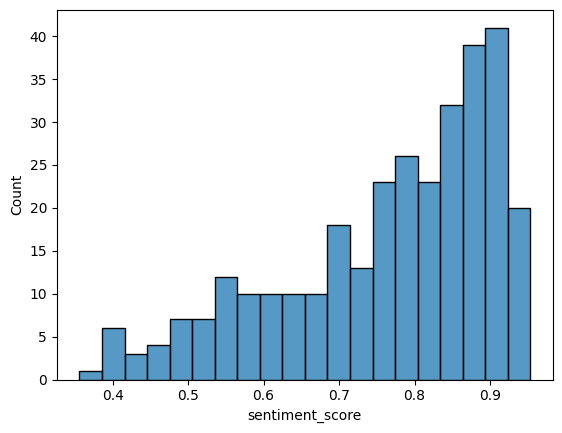

In [82]:
sns.histplot(neg['sentiment_score'], bins=20)

In [83]:
spec = neg[neg['sentiment_score'] > 0.9]

In [84]:
for text in spec['free_text']:
    print(text)

Receptionist are rude and unhelpful
I have made this clear to other members of staff. I feel Dr [PERSON] let me down and in fact was responsible for a gross dereliction of duty. She was very slow to respond to my symptoms and in retrospect did not think she believed me. She was irresponsible and failed in showing a duty of care towards me.
the surgery staff always think they know best, talk over you ,dont actively listen and then go and do exactly the same  next  time and you have to go through same crap again 
The doctors in Surgery is Extremely likely only the front desk staff needs to be destroyed very rude 
I feel totally let down by the surgery, in failing to source a Covid vaccination for me, so I could have it other than in my arms, where I have lymphoedema risk. 
Very disappointment I am y pain and only can get an appointment for 10 days after
Not a nice surgery.
Very bad receptionists, no manners, very rude, unhelpful in every way 
I left a poor practice & hoped the Stanhope p

In [91]:
sentence = """
Surgery refused to write an important letter for me. Disgraceful .
"""

sentiment_task = pipeline(
        "sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest"
    )

model_output = sentiment_task(sentence)
sentiment = model_output[0]['label']
print(sentiment)
sentiment_score = model_output[0]['score']
print(f"sentiment_score: {sentiment_score}")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


negative
sentiment_score: 0.9302981495857239


In [93]:
negative = data.copy()
neg = negative[negative["sentiment"] == "negative"]
neg

,time,rating,free_text,do_better,surgery,free_text_len,do_better_len,rating_score,classif,classif_scores,sentiment,sentiment_score,improvement_labels,feedback_labels
38,2023-07-14 07:36:00,Extremely unlikely,Not caring practice I am afraid,"More knowledge newly qualified doctors , enthu...",Earls Court Surgery,6.0,7,1.0,NaN,NaN,negative,0.772840,Medical Staff Competence,Overall Patient Satisfaction
102,2023-08-01 10:01:00,Extremely unlikely,"the receptionist behave in an unfriendly way, ...",Strict Adherence to Heart values and talk in p...,Earls Court Surgery,26.0,18,1.0,NaN,NaN,negative,0.894959,Follow-Up and Continuity of Care,Reception Staff Interaction
106,2023-08-05 17:17:00,Extremely likely,NaN,NaN,Earls Court Surgery,1.0,0,5.0,NaN,NaN,negative,0.477519,NaN,NaN
136,2023-08-09 18:12:00,Extremely unlikely,Receptionist are rude and unhelpful,"I understand their job is stressful,but there ...",Earls Court Surgery,5.0,16,1.0,NaN,NaN,negative,0.910190,Overall Patient Satisfaction,Reception Staff Interaction
141,2023-08-09 20:48:00,Extremely unlikely,I have made this clear to other members of sta...,Dr [PERSON] should have behaved as a responsib...,Earls Court Surgery,59.0,90,1.0,NaN,NaN,negative,0.909799,Patient-Doctor Communication,Patient-Doctor Communication
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,2024-03-18 19:00:06,Unlikely,I was not allowed to speak to a doctor about m...,"Yes, an ability to put my concerns to a doctor...",The Chelsea Practice,91.0,15,2.0,NaN,NaN,negative,0.828099,Telephone Service,Vaccinations
3678,2024-03-22 17:39:27,Extremely likely,There was a mix up with my appointment .. I bo...,Only if I had received the text to confirm my ...,Health Partners @ Violet Melchett,38.0,11,5.0,NaN,NaN,negative,0.607062,Follow-Up and Continuity of Care,Patient-Doctor Communication
3683,2024-03-22 18:19:35,Neither likely nor unlikely,Very disappointed in lack of info after scan a...,Receptionists (bar one) should have better exp...,Health Partners @ Violet Melchett,34.0,10,3.0,NaN,NaN,negative,0.925584,Reception Staff Interaction,Test Results
3685,2024-03-22 20:38:33,Neither likely nor unlikely,No where to park,As far as the staff concerned they do a fantas...,Health Partners @ Violet Melchett,4.0,16,3.0,NaN,NaN,negative,0.546125,Overall Patient Satisfaction,Overall Patient Satisfaction


In [104]:
from datetime import datetime, timedelta

# Convert 'time' column to datetime
neg['time'] = pd.to_datetime(neg['time'])

# Calculate the date 30 days ago from today
latest_date = datetime.now().date()
thirty_days_ago = latest_date - timedelta(days=10)

# Filter the DataFrame based on the 'time' column
neg_filtered = neg[neg['time'].dt.date > thirty_days_ago]

In [105]:
neg_filtered

,time,rating,free_text,do_better,surgery,free_text_len,do_better_len,rating_score,classif,classif_scores,sentiment,sentiment_score,improvement_labels,feedback_labels
3540,2024-03-16 10:32:29,Extremely likely,I have a Extremely likely relationship with my...,NaN,The Abingdon Health Centre,20.0,0,5.0,NaN,NaN,negative,0.582296,NaN,Follow-Up and Continuity of Care
3543,2024-03-16 18:36:15,Extremely unlikely,where to begin. we have to listen to a long ms...,NaN,Health Partners @ Violet Melchett,170.0,0,1.0,NaN,NaN,negative,0.836173,NaN,Reception Staff Interaction
3544,2024-03-16 19:47:40,Extremely likely,"I have never used the website before, but I pr...",NaN,Earls Court Surgery,23.0,0,5.0,NaN,NaN,negative,0.652121,NaN,Overall Patient Satisfaction
3546,2024-03-17 14:59:54,Likely,I'm certain I've developed CPTSD and feel as i...,NaN,Earls Court Surgery,19.0,0,4.0,NaN,NaN,negative,0.883357,NaN,Mental Health Support
3563,2024-03-18 16:26:50,Likely,In my experience always repeating my blood tes...,NaN,Royal Hospital Chelsea,12.0,0,4.0,NaN,NaN,negative,0.568610,NaN,Test Results
3574,2024-03-18 17:08:24,Neither likely nor unlikely,Worst reception staff ever! There are two ladi...,NaN,Earls Court Surgery,21.0,0,3.0,NaN,NaN,negative,0.948002,NaN,Reception Staff Interaction
3597,2024-03-18 19:00:06,Unlikely,I was not allowed to speak to a doctor about m...,"Yes, an ability to put my concerns to a doctor...",The Chelsea Practice,91.0,15,2.0,NaN,NaN,negative,0.828099,Telephone Service,Vaccinations
3678,2024-03-22 17:39:27,Extremely likely,There was a mix up with my appointment .. I bo...,Only if I had received the text to confirm my ...,Health Partners @ Violet Melchett,38.0,11,5.0,NaN,NaN,negative,0.607062,Follow-Up and Continuity of Care,Patient-Doctor Communication
3683,2024-03-22 18:19:35,Neither likely nor unlikely,Very disappointed in lack of info after scan a...,Receptionists (bar one) should have better exp...,Health Partners @ Violet Melchett,34.0,10,3.0,NaN,NaN,negative,0.925584,Reception Staff Interaction,Test Results
3685,2024-03-22 20:38:33,Neither likely nor unlikely,No where to park,As far as the staff concerned they do a fantas...,Health Partners @ Violet Melchett,4.0,16,3.0,NaN,NaN,negative,0.546125,Overall Patient Satisfaction,Overall Patient Satisfaction
